# Project setup


### Imports

In [ ]:
import os

import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt

from typing import List, Set, Dict, Tuple, Optional, Set, Iterable


import torch
import torchtext

from IPython.display import display

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#@title Configuration
IS_COLAB = True # @param { type: "boolean" }
DS_PATH = "penn_treebank" #@param { type: "string" }

### Colab setup

In [ ]:
if IS_COLAB:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Dataset preparation

In [ ]:
# Get the dataset
!wget -o log --show-progress --progress=bar https://data.deepai.org/ptbdataset.zip

ptbdataset.zip      100%[===================>]   4.36M  --.-KB/s    in 0.05s   


In [ ]:
!rm -rf $DS_PATH
!mkdir -p $DS_PATH
!unzip -d $DS_PATH ptbdataset.zip


Archive:  ptbdataset.zip
  inflating: penn_treebank/README    
  inflating: penn_treebank/ptb.char.test.txt  
  inflating: penn_treebank/ptb.char.train.txt  
  inflating: penn_treebank/ptb.char.valid.txt  
  inflating: penn_treebank/ptb.test.txt  
  inflating: penn_treebank/ptb.train.txt  
  inflating: penn_treebank/ptb.valid.txt  


In [ ]:
ptb_train_path = "ptb.train.txt"
ptb_test_path = "ptb.test.txt"
ptb_valid_path = "ptb.valid.txt"

# char version
ptb_char_train_path = "ptb.char.train.txt"
ptb_char_test_path = "ptb.char.test.txt"
ptb_char_valid_path = "ptb.char.valid.txt"

# Dataset exploration

## Utilities

In [ ]:
def get_sents_from_file(file_name: str) -> List[str]:
  sents: List[str] = []
  with open(f'{DS_PATH}/{file_name}') as file:
    for sent in file:
      sents.append(sent)
  return sents

In [ ]:
def get_words_from_sents(sents: List[str]) -> List[str]:
  words: List[str] = []
  for sent in sents:
    words.extend(sent.split())
  return words 

In [ ]:
def get_vocab(words: List[str]) -> Set[str]:
  '''
  Penn Treebank is already lowercased
  '''
  return {w for w in words}

In [ ]:
def compute_set_difference(a: Set, b: Set) -> Set:
    return a - b

In [ ]:
def compute_set_intersection(a: Set, b: Set) -> Set:
    return a.intersection(b)

In [ ]:
def plot_stats(
        sents: List[List[str]], 
        words: List[List[str]], 
        vocabs: List[List[str]]) -> None:

    splits = ['train', 'test', 'valid']
    cols = ['sentences', 'words', 'vocab size']

    data = {col: [len(l) for l in split] for col, split in zip(cols, [sents, words, vocabs])}

    table = pd.DataFrame(data, index = splits)
    display(table)

In [ ]:
def plot_split_percentage(
        sents: List[List[str]], 
        words: List[List[str]]) -> None:

    splits = ['train', 'test', 'valid']
    cols = ['sentences', 'words', 'vocab size']


    sents_tot = sum([len(l) for l in sents])
    words_tot = sum([len(l) for l in words])
    sents_perc = [len(l) / sents_tot for l in sents]
    words_perc = [len(l) / words_tot for l in words]

    fig, axs = plt.subplots(1, 2)
    for idx, (col, data) in enumerate(zip(cols, [sents_perc, words_perc])):
        axs[idx].set_title(f'{col} split percentage')
        axs[idx].pie(
            data, 
            labels = splits, 
            autopct = '%1.1f%%',
            shadow = True, 
            startangle = 90,
            )

    plt.show()

In [ ]:
def print_oov_words(vocabs: Iterable, train_vocab: Set[str]) -> None:
    oov_words_list = []
    for vocab in vocabs:
        oov_words_list.append(compute_set_difference(vocab, train_vocab))
    names = ['test oov words', 'valid oov words']
    data = {name: [len(oovs)] for (name, oovs) in zip(names, oov_words_list)}
    table = pd.DataFrame(data, index=['size'])
    display(table)

## Dataset statistics

In [ ]:
sents_train = get_sents_from_file(ptb_train_path)
sents_test = get_sents_from_file(ptb_test_path)
sents_valid = get_sents_from_file(ptb_valid_path)

words_train = get_words_from_sents(sents_train)
words_test = get_words_from_sents(sents_test)
words_valid = get_words_from_sents(sents_valid)

vocab_train = get_vocab(words_train)
vocab_test = get_vocab(words_test)
vocab_valid = get_vocab(words_valid)

In [ ]:
plot_stats(
    [sents_train, sents_test, sents_valid],
    [words_train, words_test, words_valid],
    [vocab_train, vocab_test, vocab_valid],
)

,sentences,words,vocab size
train,42068,887521,9999
test,3761,78669,6048
valid,3370,70390,6021


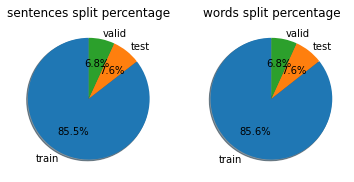

In [ ]:
plot_split_percentage(
    [sents_train, sents_test, sents_valid],
    [words_train, words_test, words_valid]
)

## OOV words

In [ ]:
print_oov_words([vocab_test, vocab_valid], vocab_train)

,test oov words,valid oov words
size,0,0
